In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./data/well_data.xlsx", converters={'Collection Date':str,
                                                        'City': lambda x: str(x.strip())})

In [3]:
len(df)

1714

In [4]:
# select columns

df = df[["Address",
         "City",
         "State",
         "ZipCode",
         "Well Permit #",
         "STARLIMS ID",
         "Collection Date",
         "Arsenic",
         "pH"]]

In [5]:
# rename columns

df.columns = ["add","city","state","zip","id","altid","date","ar","ph"]

In [6]:
df['city'].value_counts().keys()

Index(['GASTONIA', 'BELMONT', 'DALLAS', 'MOUNT HOLLY', 'BESSEMER CITY',
       'STANLEY', 'KINGS MOUNTAIN', 'CHERRYVILLE', 'LINCOLNTON', 'Gastonia',
       'Dallas', 'Mount Holly', 'Stanley', 'Belmont', 'Bessemer City',
       'CROUSE', 'ALEXIS', 'Lincolnton', 'Cherryville', 'Kings Mountain',
       'CRAMERTON', 'KINGS MOUTAIN', 'LOWELL', 'Crouse', 'Mt. Holly',
       'King Mtn 1Kings Mountain', 'MC ADENVILLE', 'LOWEL', 'IRON STATION',
       'STALEY', 'PINEVILLE', 'MT HOLLY', 'Bassemer City'],
      dtype='object')

In [35]:
# Check for missing values

df.isnull().sum()

add           0
city          1
state         0
zip           0
permitno    614
altid         0
date          0
ar           13
ph           11
dtype: int64

In [62]:
li = []

for each in df['city']:

    if each in ['GASTONIA', 'Gastonia']:
        li.append('GASTONIA')

    elif each in ['BELMONT', 'Belmont']:
        li.append('BELMONT')

    elif each in ['DALLAS', 'Dallas']:
        li.append('DALLAS')
    
    elif each in ['MOUNT HOLLY', 'Mt. Holly','MT HOLLY', 'Mount Holly']:
        li.append('MT HOLLY')

    elif each in ['STANLEY','Stanley', 'STALEY']:
        li.append('STANLEY')
    
    elif each in ['BESSEMER CITY', 'Bessemer City','Bassemer City']:
        li.append('BESSEMER CITY')
    
    elif each in ['KINGS MOUNTAIN', 'Kings Mountain','KINGS MOUTAIN','King Mtn 1Kings Mountain']:
        li.append('KINGS MTN')
    
    elif each in['CHERRYVILLE', 'Cherryville']:
        li.append('CHERRYVILLE')
    
    elif each in['LINCOLNTON','Lincolnton']:
        li.append('LINCOLNTON')
    
    elif each in['IRON STATION']:
        li.append('IRON STATION')

    elif each in['ALEXIS']:
        li.append('ALEXIS')

    elif each in['LOWEL','LOWELL']:
        li.append('LOWELL')

    elif each in['CROUSE', 'Crouse']:
        li.append('CROUSE')

    elif each in['CRAMERTON']: 
        li.append('CRAMERTON')


    elif each in ['MC ADENVILLE']:
        li.append('MCADENVILLE')

    elif each == 'PINEVILLE':
        li.append('PINEVILLE')
    else:
        li.append("")



df['city'] = li

df['city'].value_counts()

GASTONIA         360
BELMONT          285
DALLAS           254
MT HOLLY         183
STANLEY          168
BESSEMER CITY    162
KINGS MTN         99
CHERRYVILLE       90
LINCOLNTON        64
CROUSE            23
ALEXIS            16
LOWELL             3
CRAMERTON          3
PINEVILLE          1
MCADENVILLE        1
                   1
IRON STATION       1
Name: city, dtype: int64

In [7]:
# Convert long date to short date

df['date'] = df['date'].str[:10]

df['date'] = df['date'].replace(regex=['2/1/2021'], value='2021-02-01')

In [8]:
# convert date to datetime

df['date'] = pd.to_datetime(df['date'])

In [9]:
# convert non-detect arsenic values to 0

li = []
for each in df['ar']:
    if each in('<0.001','< 0.005', '<0.005', '<0.01'):
        li.append(float(0))
    else:
        li.append(float(each))

df['ar'] = li

In [10]:
# Create a new column to group arsenic values into 0 and 1, 0 for <0.001 and 1 for >=0.001

li = []
for each in df['ar']:
    if each < 0.001:
        li.append('0')
    else: li.append('1')

df['group'] = li

# Create a new column to group arsenic values into 0 and 1, 0 for <0.005 and 1 for >=0.005

li = []
for each in df['ar']:
    if each < 0.005:
        li.append('0')
    else: li.append('1')

df['group_five'] = li



In [ ]:


# if missing arsenic or ph values, drop the row

df = df.dropna(subset=['ar','ph'])


In [67]:
df['city'] = [s.strip() for s in df['city']]

# drop rows with missing city values

df = df[df['city'] != '']

In [68]:
# save the cleaned data to a new file in data folder

df.to_csv("./data/well_data_cleaned.csv", index=False)

In [11]:
# create 2 new dataframes, one to check the number of elevated arsenic samples 2011-2017 
# and the other to check the number of elevated arsenic samples 2018-2022

df['year'] = df['date'].dt.year


In [20]:

new = df[df['year'] > 2017]
og = df[df['year'] < 2018]

Number of elevated samples for two periods, with 0.001 as the threshold

In [12]:
print('number of elevated arsenic samples 2011-2017')

len(og[og['group'] == '1'])

number of elevated arsenic samples 2011-2017


41

In [13]:
print('number of elevated arsenic samples 2018-2022')

len(new[new['group'] == '1'])

number of elevated arsenic samples 2018-2022


92

Number of elevated samples for two periods, with 0.005 as the threshold

In [39]:
print('number of elevated arsenic samples 2011-2017')
len(og[og['group_five'] == '1'])

number of elevated arsenic samples 2011-2017


41

In [18]:
len(og)

1034

In [21]:
# count duplicate permit numbers

og['id'].value_counts()

12090    2
11431    2
11665    2
11531    1
6513     1
        ..
882      1
9807     1
9995     1
2653     1
12603    1
Name: id, Length: 608, dtype: int64

In [40]:
print('number of elevated arsenic samples 2018-2022')
len(new[new['group_five'] == '1'])

number of elevated arsenic samples 2018-2022


32

In [15]:
len(df[(df['year'] < 2018)])

1034

In [14]:
df[(df['year'] < 2018)].isnull().sum()

add             0
city            1
state           0
zip             0
id            423
altid           0
date            0
ar              0
ph              0
group           0
group_five      0
year            0
dtype: int64

Since testing instruments couldn't detect below 0.005 prior to 2018, there are many samples between 0.001 and 0.005 for 2018-2022 thus making it look like the number of elevated detects has increased. 0.001 was chosen as the cutoff still for modeling purposes since it's the 0.001-0.005 is still of concern to health. If the cutoff was 0.005, the bar chart would show 41 elevated samples 2011-2017 and 19 for 2018-2022 instead

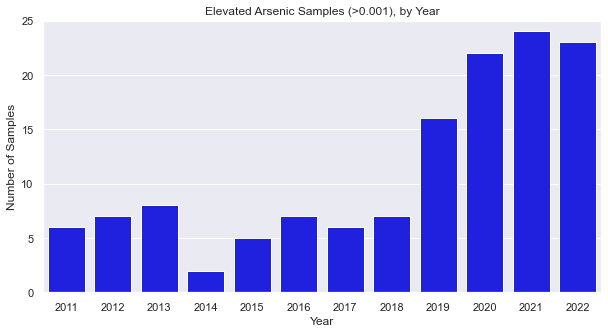

In [64]:
# bar chart of elevated arsenic samples (>0.001) 2011-2022

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=df[df['group'] == '1'], color='blue')
plt.title('Elevated Arsenic Samples (>0.001), by Year')
plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.ylim(0, 25);


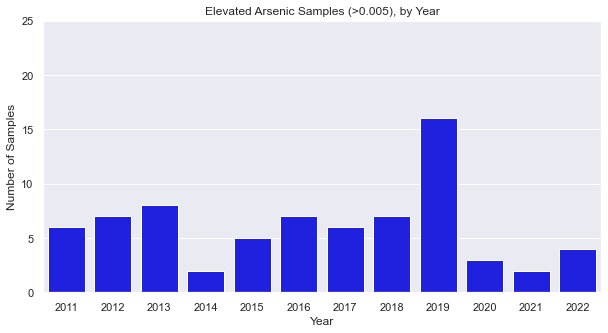

In [65]:
# bar chart of elevated arsenic samples (>0.005) 2011-2022

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=df[df['group_five'] == '1'], color='blue')
plt.title('Elevated Arsenic Samples (>0.005), by Year')
plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.ylim(0, 25);


In [74]:
df= df.sort_values(by=['date'])
viz = df.set_index('date')
avg_yearly = viz['ar'].resample('Y').mean()

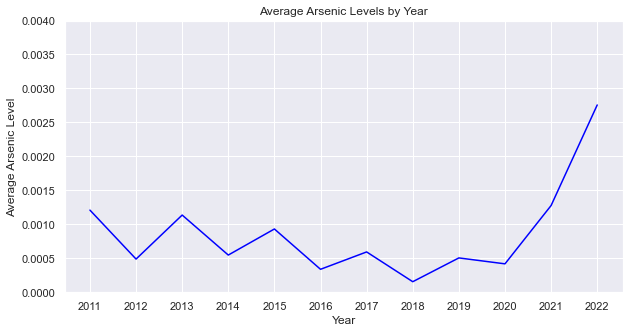

In [78]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_yearly.index.year, y=avg_yearly.values, color='blue')
plt.title('Average Arsenic Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Arsenic Level')
plt.ylim(0, 0.004)
plt.xticks(np.arange(2011, 2023, 1));

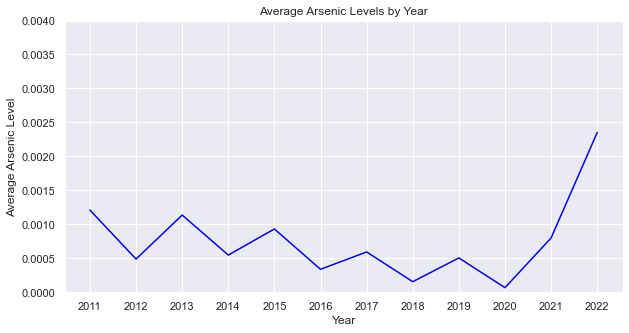

In [83]:
# same as above but with elevated arsenic samples defined as >= 0.005

df= df.sort_values(by=['date'])
viz = df.set_index('date')

li = []

for each in viz['ar']:
    if each < 0.005:
        li.append(float(0))
    else: li.append(each)

viz['ar'] = li


avg_yearly = viz['ar'].resample('Y').mean()

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_yearly.index.year, y=avg_yearly.values, color='blue')
plt.title('Average Arsenic Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Arsenic Level')
plt.ylim(0, 0.004)
plt.xticks(np.arange(2011, 2023, 1));


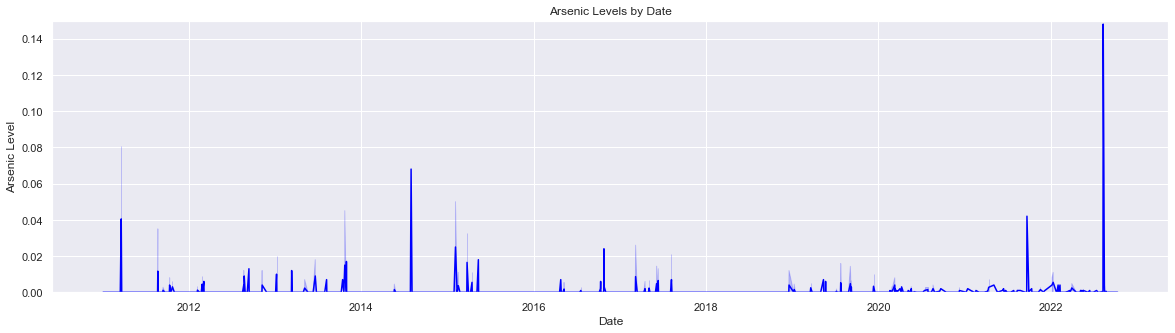

In [89]:
# line plot of arsenic samples 

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(20, 5))
sns.lineplot(x=df['date'], y=df['ar'], color='blue')
plt.title('Arsenic Levels by Day 2011-2022')
plt.xlabel('Date')
plt.ylabel('Arsenic Level')
plt.ylim(0, 0.15);



In [28]:
# Number of total

df['group'].value_counts()

0    1581
1     133
Name: group, dtype: int64

Check the percentage of elevated samples by year

In [106]:
viz = df[['year','group_five']]

viz = pd.get_dummies(viz, columns=['group_five'])

viz = viz.groupby(['year']).sum()

viz = pd.DataFrame(viz.reset_index())

viz['total'] = (viz['group_five_0'] + viz['group_five_1'])

viz['group_five_0_pct'] = round(((viz['group_five_0'] / viz['total']) * 100), 2)

viz['group_five_1_pct'] = round(((viz['group_five_1'] / viz['total']) * 100), 2)

viz.set_index('year', inplace=True)

viz = viz[['group_five_1', 'group_five_1_pct', 'total']]
viz.columns = ['> 0.005', '% > 0.005', 'Total']
viz